<a href="https://colab.research.google.com/github/Toyi15/intro_visualizaciones/blob/main/4_intro_visualizaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# Visualización de Datos con Matplotlib, Seaborn y Pyplot

---
# Datasets:
* Dataset 1: [Netflix Movies and TV Shows](https://www.kaggle.com/datasets/shivamb/netflix-shows)
* Dataset 2: [World Happiness Report](https://www.kaggle.com/datasets/unsdsn/world-happiness)

---
# Objetivo
* Aplicar los conocimientos en gráficos cualitativos y cuantitativos, usando las herramientas de Python, en 2 dataset con contextos diferentes.

---
# IMPORTACIÓN DE LIBRERÍAS

In [1]:
# Iportar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración general de estilo de gráficos
sns.set_style('darkgrid')

---
# 1. NETFLIX MOVIES AND TV SHOWS

In [2]:
# Carga del dataset
df_netflix = pd.read_csv('netflix_titles.csv')

# Vista general de los datos
df_netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


---
## 1.1 Gráfico de barras: Conteo de tipos de contenido (Películas vs Series)
* Distribución de títulos por tipo (Película o Serie)

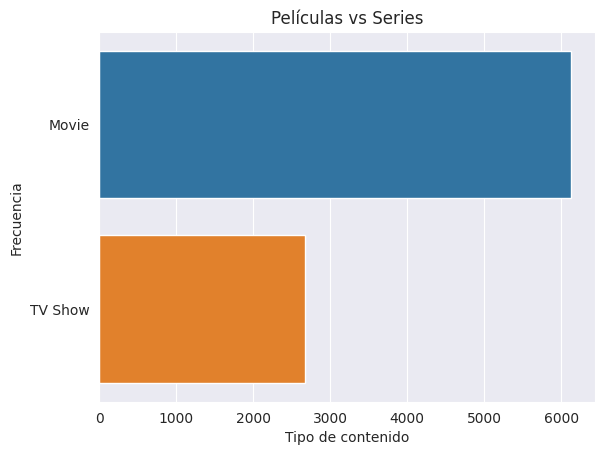

In [3]:
# Crea un gráfico de barras (countplot) para visualizar la cantidad de cada tipo de contenido por separado.
sns.countplot(data=df_netflix, y='type', hue='type')

# Título del gráfico.
plt.title('Películas vs Series')
# Etiqueta del eje horizontal.
plt.xlabel('Tipo de contenido')

# Etiqueta del eje vertical.
plt.ylabel('Frecuencia')

# Mostrar Gráfico.
plt.show()

----
## 1.2 Gráfico de barras: Top 10 países con más producciones

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'India'),
  Text(2, 0, 'United Kingdom'),
  Text(3, 0, 'Japan'),
  Text(4, 0, 'South Korea'),
  Text(5, 0, 'Canada'),
  Text(6, 0, 'Spain'),
  Text(7, 0, 'France'),
  Text(8, 0, 'Mexico'),
  Text(9, 0, 'Egypt')])

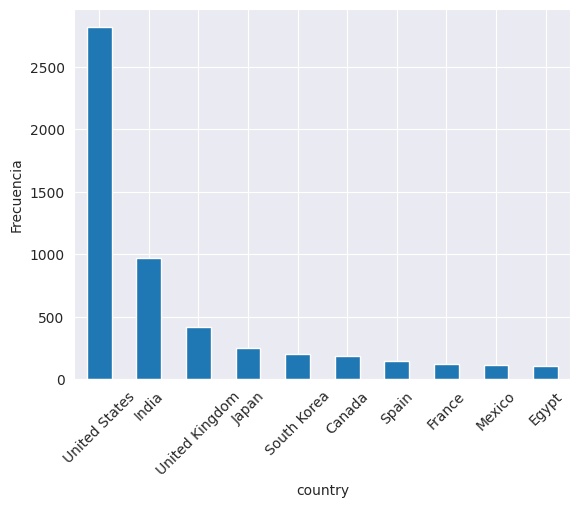

In [4]:
# Serie con la frecuencia de los 10 países con mayor frecuencia dentro del DataFrame
df_netflix['country'].value_counts().head(10).plot(kind='bar')
# Gráficar barras

plt.ylabel('Frecuencia')
# Rotación en las etiquetas del eje x
plt.xticks(rotation=45)

---
## 1.3 Gráfico de líneas: Evolución de títulos a lo largo del tiempo
* Número de títulos añadidos por año

Text(0, 0.5, 'Año')

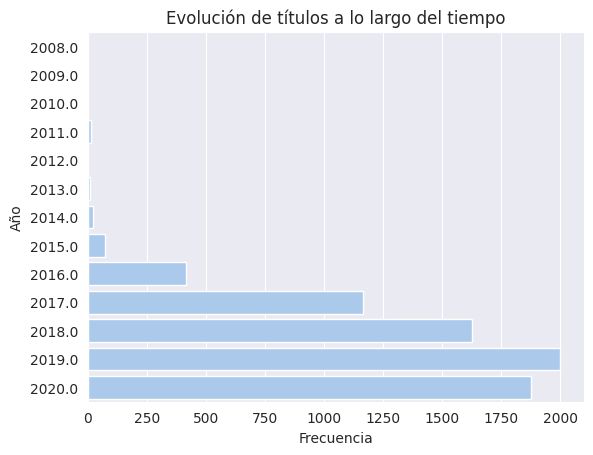

In [5]:
# Convertir la columna 'date_added' al tipo datetime.
df_netflix['date_added'] = pd.to_datetime(df_netflix['date_added'], errors='coerce')
# 'errors='coerce'' reemplaza cualquier valor que no pueda ser convertido a datetime con 'NaT' (Not a Time).

# Extraer el año de la columna 'date_added' y convertirla a tipo numérico.
# Crear nueva columna con el año en que se añadió el contenido.
df_netflix['year added'] = pd.to_numeric(df_netflix['date_added'].dt.year)

# Contar la frecuencia de cada año en la columna 'year_added',
# Ordenar los años de forma ascendente (sort_index()),

# Crear el gráfico de barras ('bar') con las cantidades
sns.countplot( data=df_netflix, y='year added', order=df_netflix['year added'].value_counts().sort_index().index[:13], color='#a1c9f4')

plt.title('Evolución de títulos a lo largo del tiempo')
plt.xlabel('Frecuencia')
plt.ylabel('Año')

---
# 2. WORLD HAPPINESS REPORT

In [6]:
# Carga del dataset
df_world = pd.read_csv('world-happiness-report.csv')

# Vista general
df_world.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


---
## 2.1 Gráfico de dispersión: PIB vs Nivel de felicidad

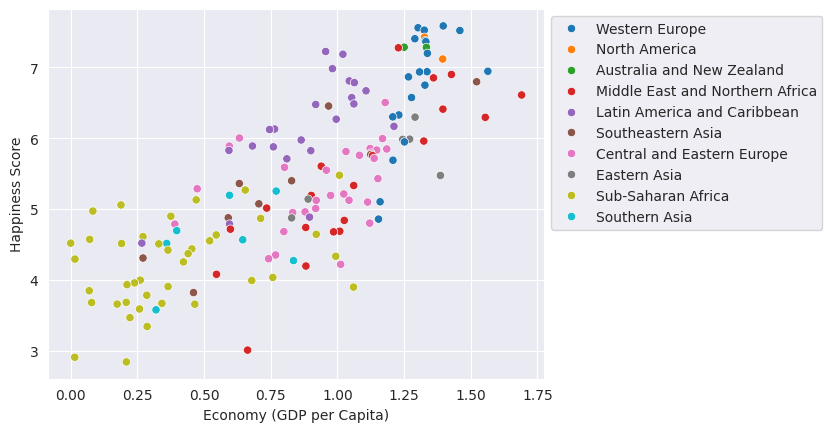

In [9]:
# 'data=happiness_df' especifica el DataFrame que contiene los datos sobre felicidad y economía.
# 'x='Economy (GDP per Capita)'' indica que la variable 'Economy (GDP per Capita)' se representará en el eje horizontal.
# 'y='Happiness Score'' indica que la variable 'Happiness Score' se representará en el eje vertical.
# 'hue='Region'' colorea los puntos del gráfico según la región a la que pertenece cada país, añadiendo una tercera dimensión visual.
# 'alpha=0.7' establece la transparencia de los puntos en 0.7, lo que ayuda a visualizar puntos superpuestos.
sns.scatterplot(data=df_world, x='Economy (GDP per Capita)', y='Happiness Score', hue='Region', alpha=1)

# leyenda para distinguir las regiones.
plt.legend(loc='best', bbox_to_anchor=(1, 1))
# 'loc='best'' coloca la leyenda en la ubicación óptima dentro del gráfico para evitar superponerse con los datos.
# 'bbox_to_anchor=(1,1)' coloca fuera del área del gráfico, en la esquina superior derecha.

---
## 2.2 Heatmap: Correlación entre variables numéricas

<Axes: >

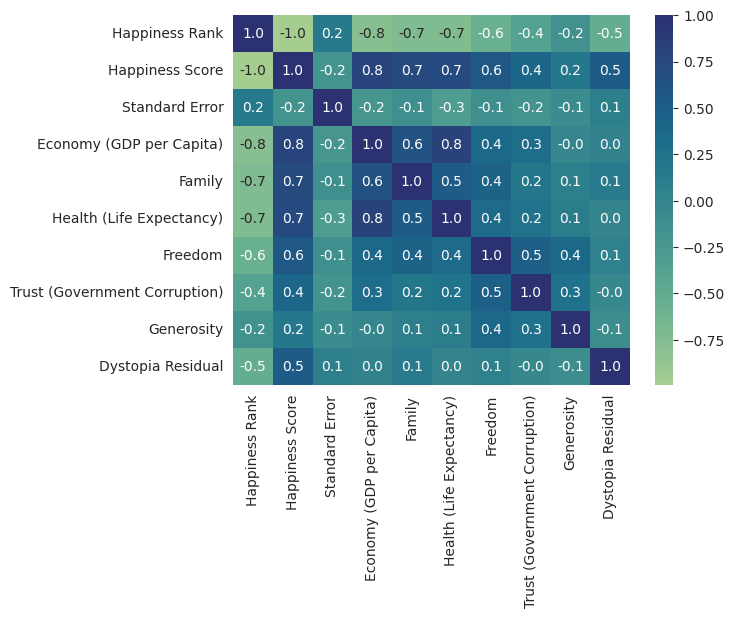

In [10]:
# Mapa de calor de la correlaciones de las columnas numéricas
sns.heatmap(data=df_world.corr( numeric_only=True ), annot=True, cmap='crest', fmt=".1f")
# 'numeric_only=True' asegura que la correlación se calcule solo para las columnas numéricas.
# sns.heatmap()' genera un mapa de calor a partir de esta matriz de correlación.
# 'annot=True' muestra los valores de correlación dentro de cada celda del mapa de calor.
# 'cmap='crest'' utiliza el esquema de colores 'crest' para representar las diferentes intensidades de correlación.
# 'fmt=".2f"' formatea los valores mostrados en el mapa de calor con dos decimales.




---
## 2.3 Boxplot: Distribución de felicidad por región

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Western Europe'),
  Text(1, 0, 'North America'),
  Text(2, 0, 'Australia and New Zealand'),
  Text(3, 0, 'Middle East and Northern Africa'),
  Text(4, 0, 'Latin America and Caribbean'),
  Text(5, 0, 'Southeastern Asia'),
  Text(6, 0, 'Central and Eastern Europe'),
  Text(7, 0, 'Eastern Asia'),
  Text(8, 0, 'Sub-Saharan Africa'),
  Text(9, 0, 'Southern Asia')])

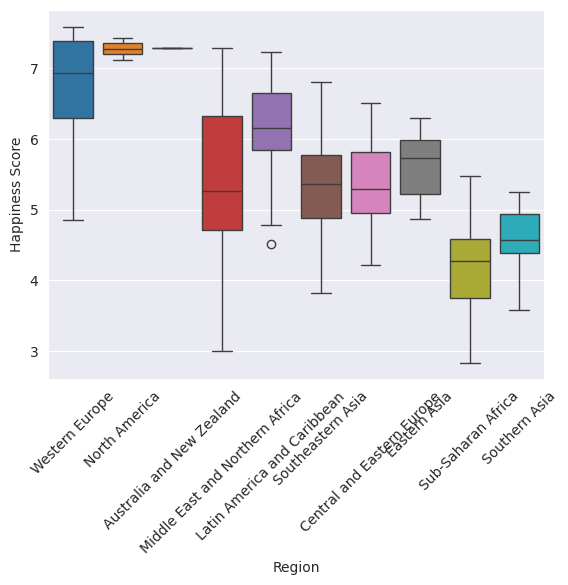

In [11]:
# Diagrama de caja (boxplot)
sns.boxplot(data=df_world, x='Region', y='Happiness Score', hue='Region')
# 'data=happiness_df' especifica el DataFrame que contiene los datos de felicidad por región.
# 'x='Region'' indica que las diferentes regiones se representarán a lo largo del eje horizontal.
# 'y='Happiness Score'' indica que la distribución del puntaje de felicidad se mostrará a lo largo del eje vertical para cada región.

plt.xticks(rotation=45)

